In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
base = pd.read_csv('AirPassengers.csv')

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_format = dateparse)
base

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: #Passengers, Length: 144, dtype: int64

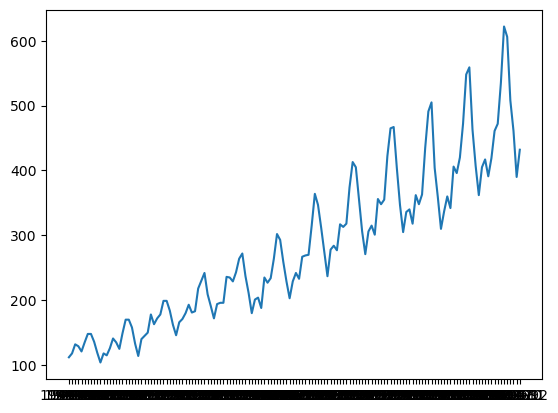

In [16]:
ts = base['#Passengers']
plt.plot(ts)
ts

In [28]:
decomposicao = seasonal_decompose(ts, period = 12)

Month
1949-11    129.000000
1949-12    129.750000
1950-01    131.250000
1950-02    133.083333
1950-03    134.916667
Name: trend, dtype: float64

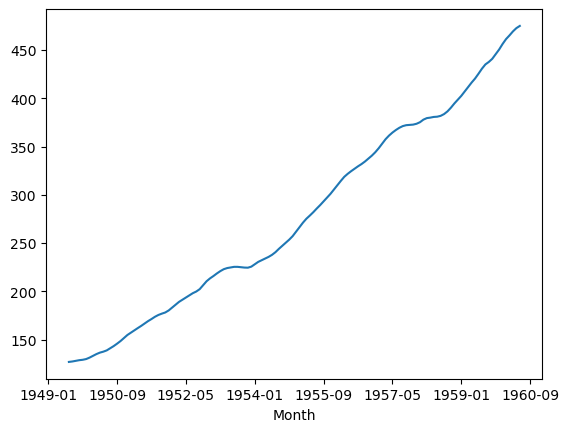

In [52]:
#Tendencia
tendencia = decomposicao.trend
tendencia.plot()
tendencia.iloc[10:15]

Month
1949-01   -24.748737
1949-02   -36.188131
1949-03    -2.241162
1949-04    -8.036616
1949-05    -4.506313
             ...    
1960-08    62.823232
1960-09    16.520202
1960-10   -20.642677
1960-11   -53.593434
1960-12   -28.619949
Name: seasonal, Length: 144, dtype: float64

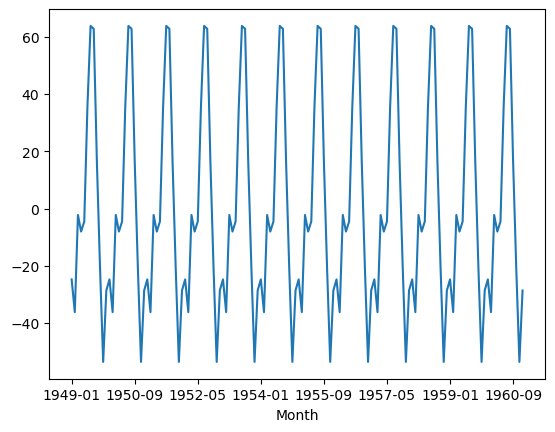

In [46]:
#Sazonalizacao
sazonal = decomposicao.seasonal
sazonal.plot()
sazonal

Month
1949-11    28.593434
1949-12    16.869949
1950-01     8.498737
1950-02    29.104798
1950-03     8.324495
1950-04     6.619949
1950-05    -7.910354
1950-06   -25.152778
1950-07   -34.747475
1950-08   -35.989899
Name: resid, dtype: float64

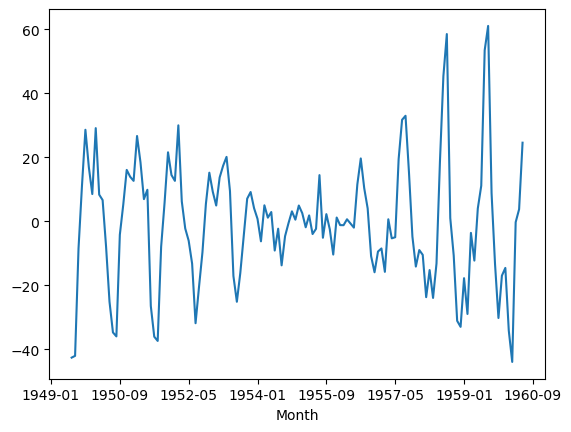

In [50]:
aleatorio = decomposicao.resid
aleatorio.plot()
aleatorio.iloc[10:20]